In [8]:
# Finding the correlation between Women, Major Category and Employement Rate
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# read data into a DataFrame
data = pd.read_csv('data/recent-grads.csv', index_col=0)
data.head()

Major_code                                      Major Major_category  \
Rank                                                                         
1           2419                      PETROLEUM ENGINEERING    Engineering   
2           2416             MINING AND MINERAL ENGINEERING    Engineering   
3           2415                  METALLURGICAL ENGINEERING    Engineering   
4           2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING    Engineering   
5           2405                       CHEMICAL ENGINEERING    Engineering   

      Total  Sample_size    Men  Women  ShareWomen  Employed  Full_time  \
Rank                                                                      
1      2339           36   2057    282    0.120564      1976       1849   
2       756            7    679     77    0.101852       640        556   
3       856            3    725    131    0.153037       648        558   
4      1258           16   1123    135    0.107313       758       1069   
5     32260          289  21239  11021    0.341631     25694      23170   

      Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
Rank                                                                           
1           270                  1207          37           0.018381  110000   
2           170                   388          85           0.117241   75000   
3           133                   340          16           0.024096   73000   
4           150                   692          40           0.050125   70000   
5          5180                 16697        1672           0.061098   65000   

      P25th   P75th  College_jobs  Non_college_jobs  Low_wage_jobs  
Rank                                                                
1     95000  125000          1534               364            193  
2     55000   90000           350               257             50  
3     50000  105000           456               176              0  
4     43000   80000           529               102              0  
5     50000   75000         18314              4440            972

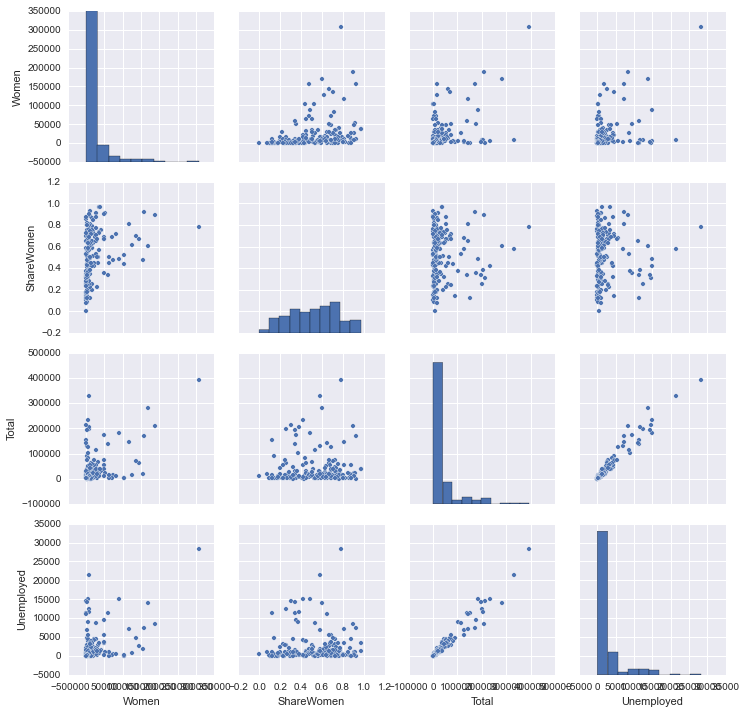

In [13]:
# scatter plot in Seaborn
# sns.pairplot(data, x_vars=['Women','ShareWomen','Total'], y_vars='Unemployment_rate', size=6, aspect=0.7)

sns.pairplot(data[['Women','ShareWomen','Total', 'Unemployed']])

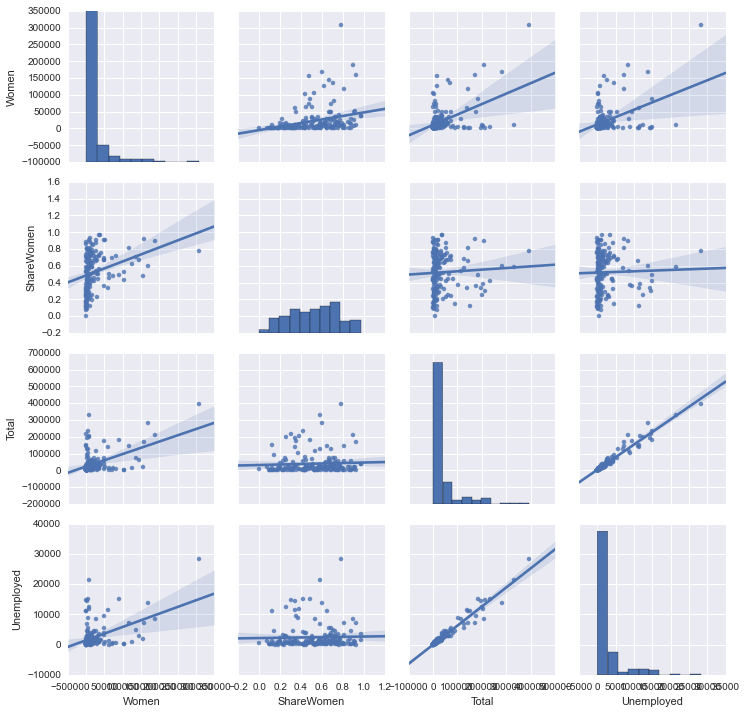

In [14]:
# include a "regression line"
# sns.pairplot(data, x_vars=['Women','ShareWomen','Total'], y_vars='Unemployement_rate', size=6, aspect=0.7, kind='reg')

sns.pairplot(data[['Women','ShareWomen','Total', 'Unemployed']], kind='reg')

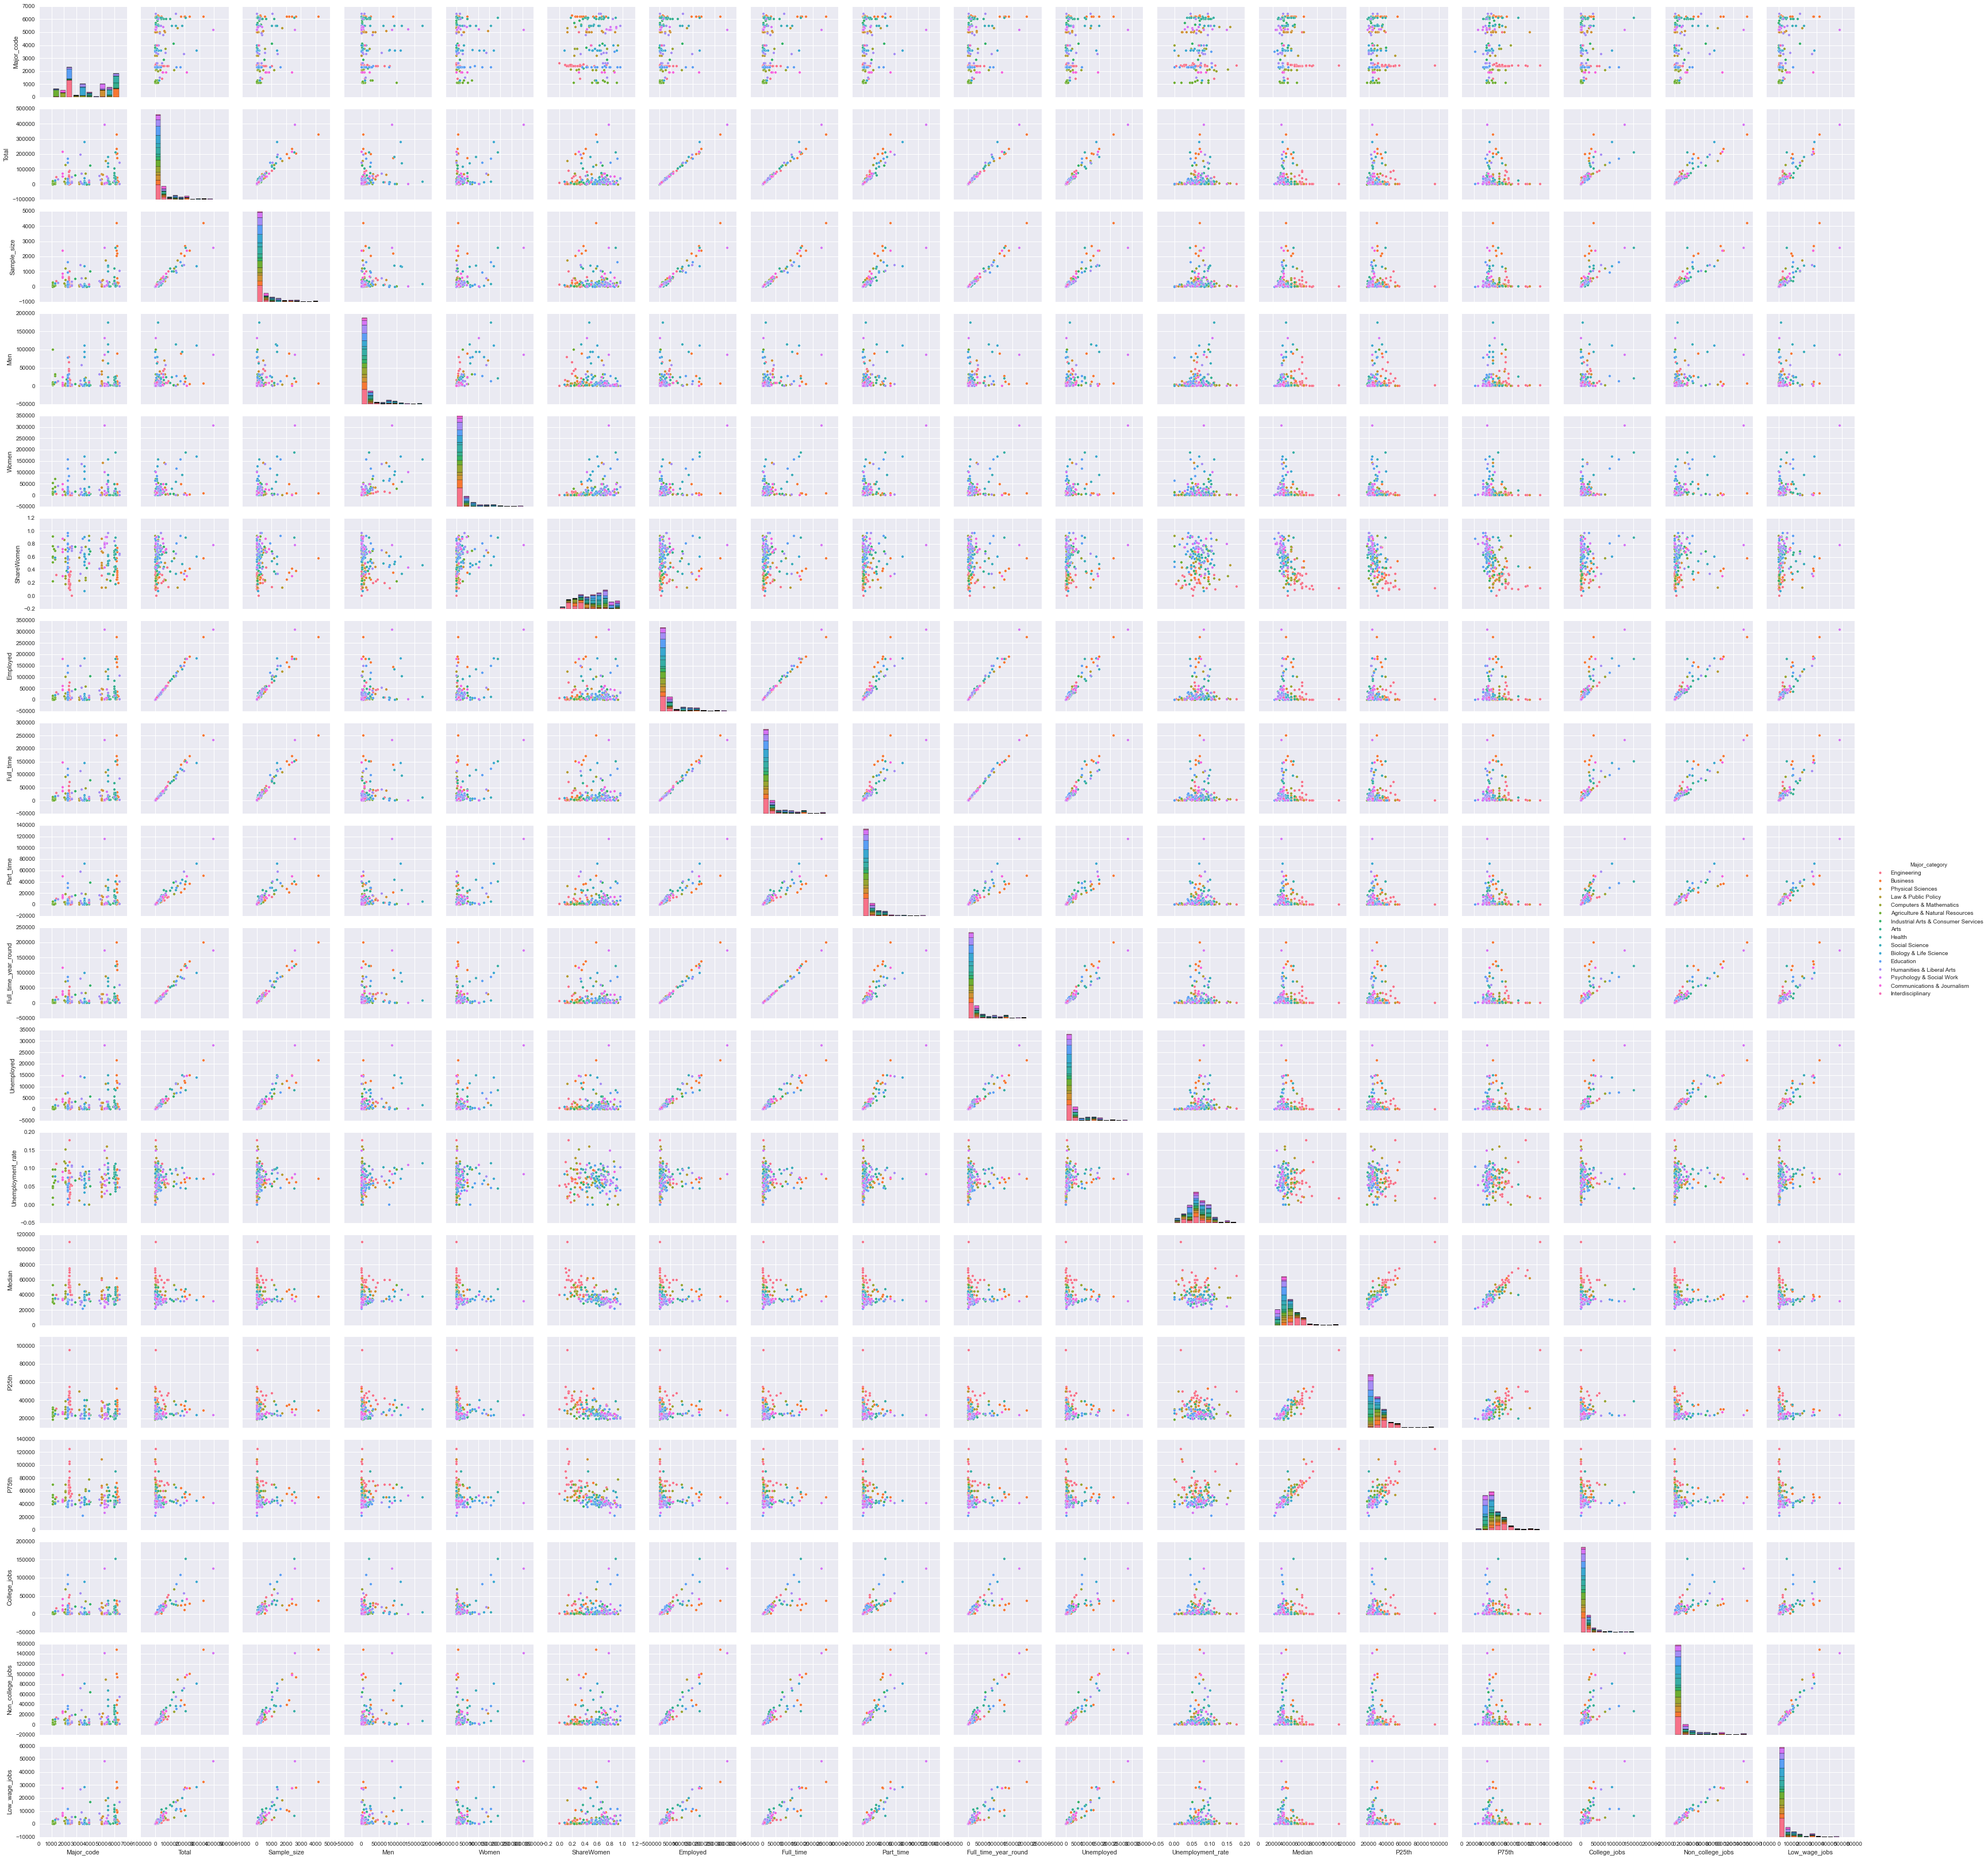

In [18]:
sns.pairplot(data, hue="Major_category")

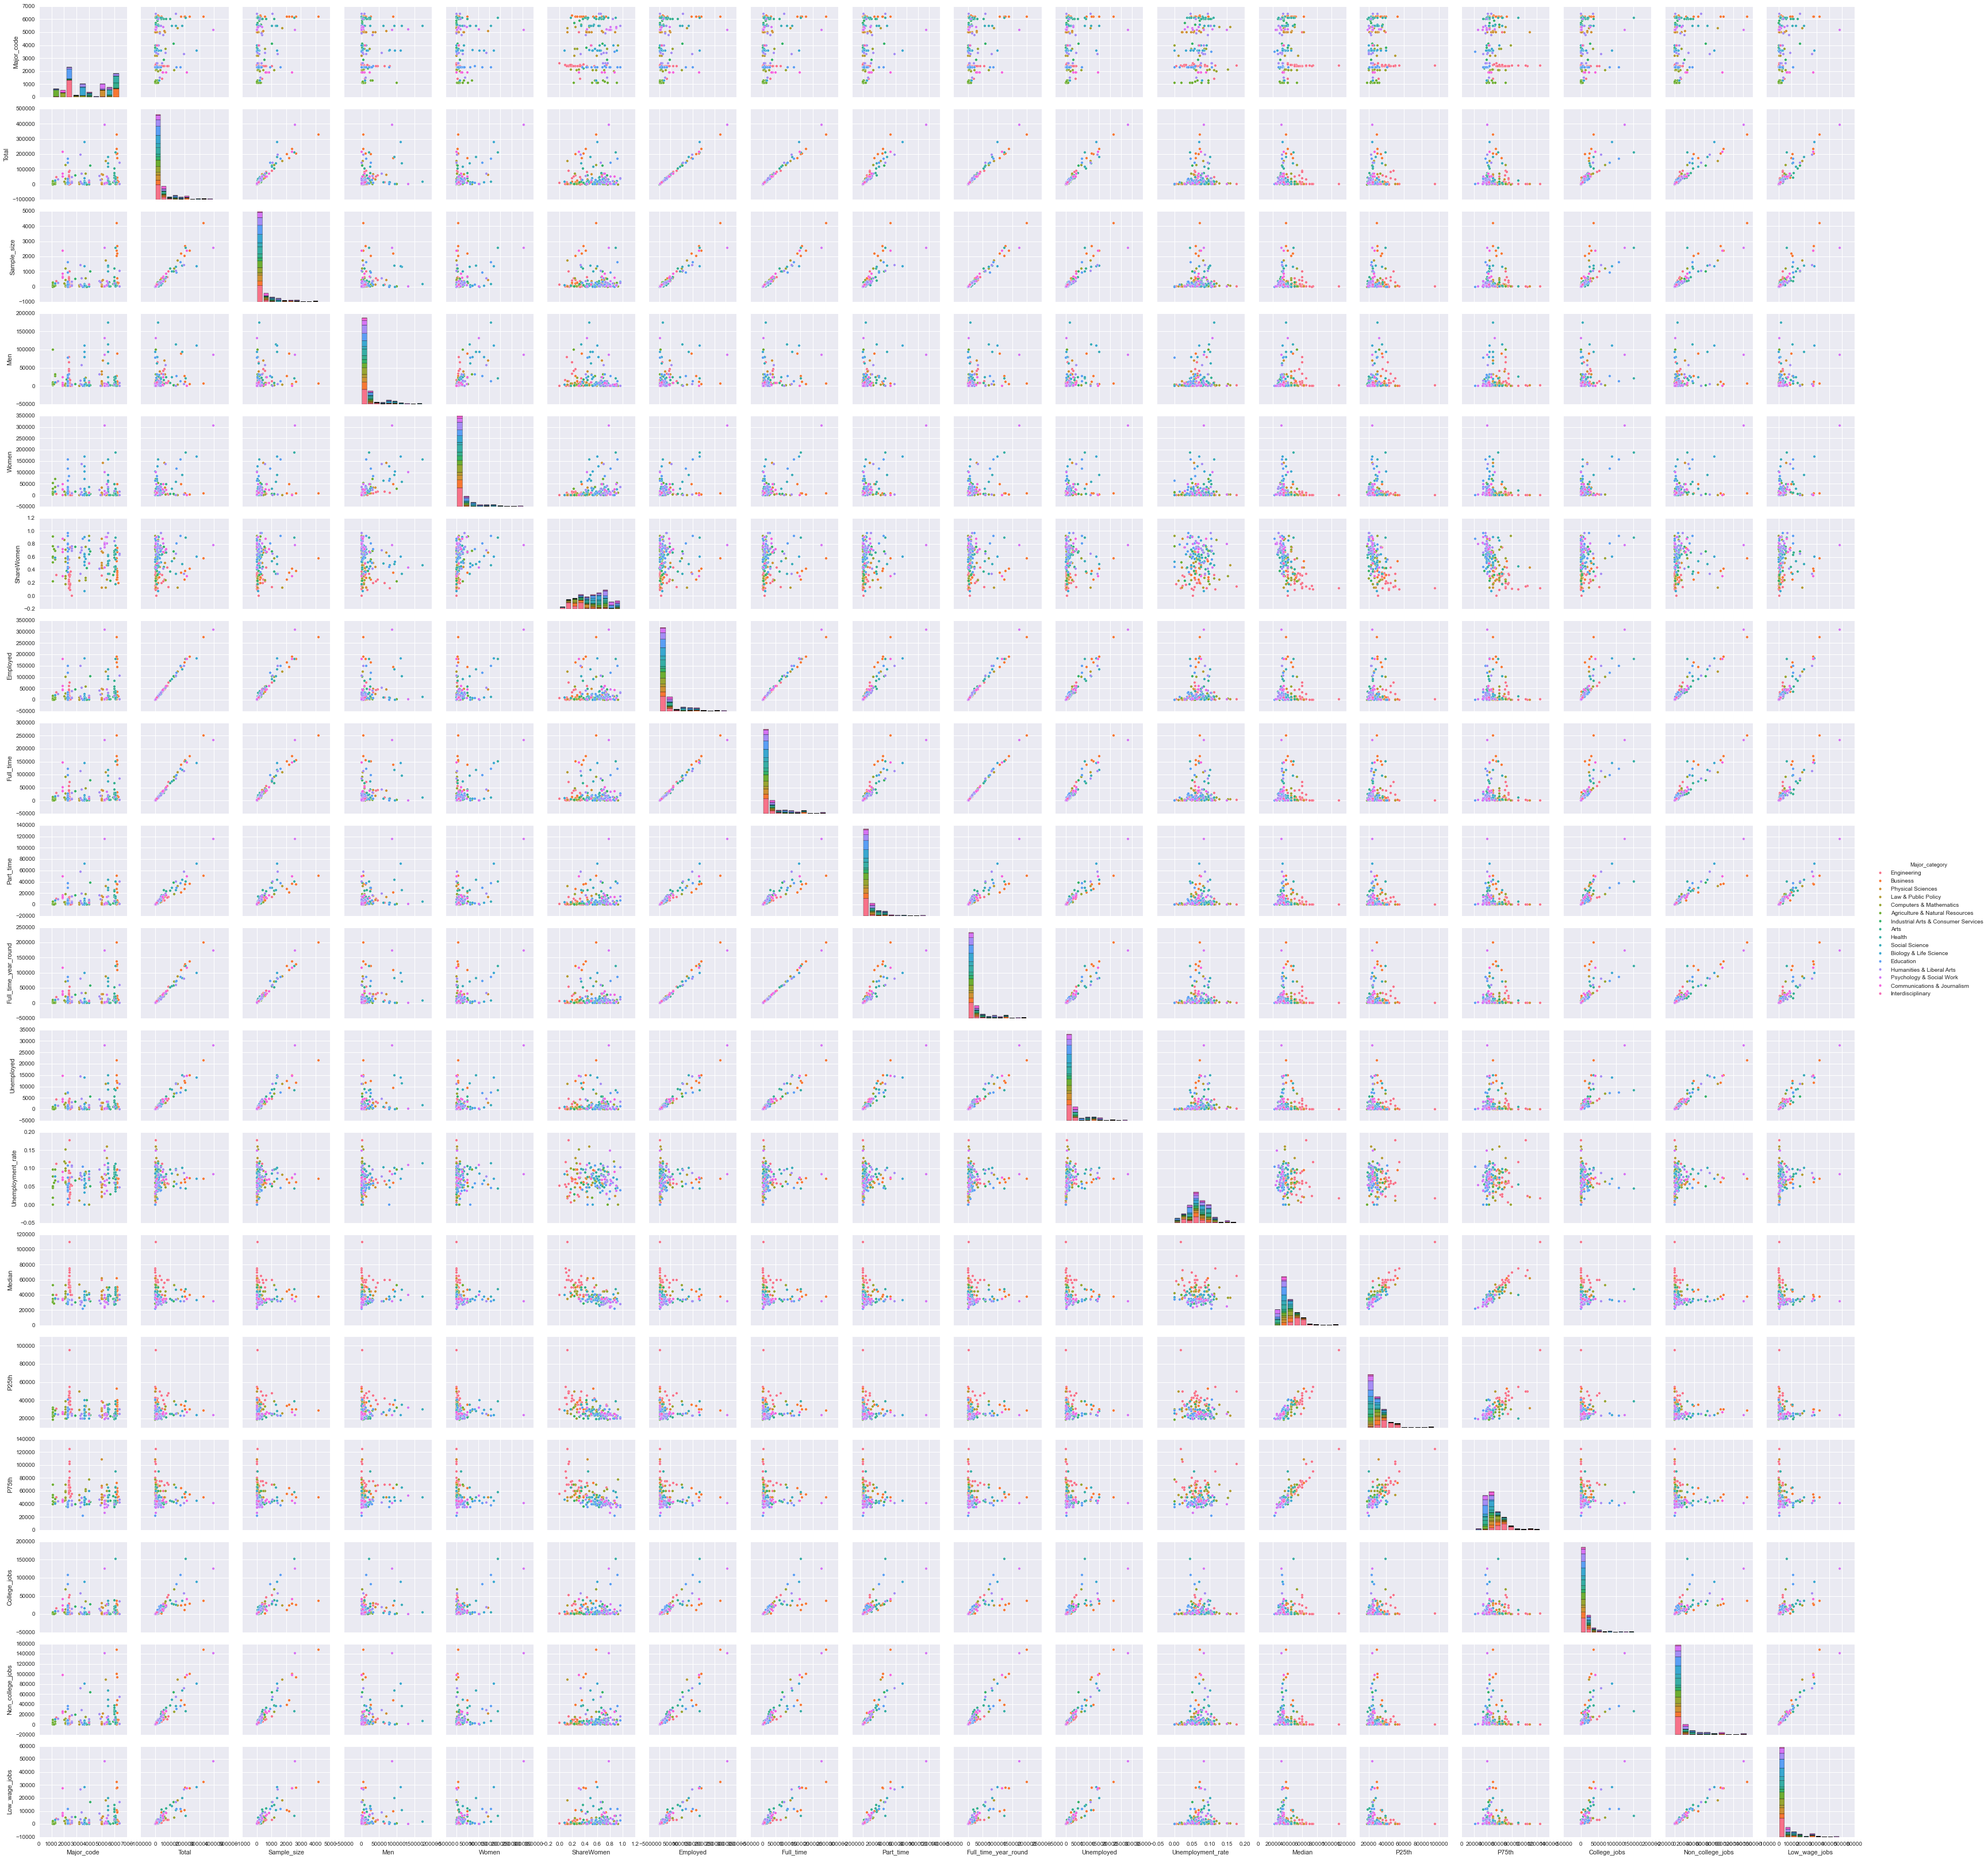

In [20]:
sns.pairplot(data, hue="Major_category", palette="husl")

In [30]:
sns.pairplot[data[data['Major_category'].isin(['Engineering', 'Arts', 'Physical Sciences'])]]

TypeError: 'function' object has no attribute '__getitem__'

In [31]:
data['Major_category']

Rank
1                              Engineering
2                              Engineering
3                              Engineering
4                              Engineering
5                              Engineering
6                              Engineering
7                                 Business
8                        Physical Sciences
9                              Engineering
10                             Engineering
11                             Engineering
12                             Engineering
13                             Engineering
14                             Engineering
15                             Engineering
16                             Engineering
17                             Engineering
18                             Engineering
19                             Engineering
20                     Law & Public Policy
21                 Computers & Mathematics
22         Agriculture & Natural Resources
23                             Engineering
24    

In [35]:
categories = ['Engineering', 'Education', 'Arts', 'Physical Sciences']
category_mask = data['Major_category'].isin(categories)
data[category_mask]

Major_code                                              Major  \
Rank                                                                  
1           2419                              PETROLEUM ENGINEERING   
2           2416                     MINING AND MINERAL ENGINEERING   
3           2415                          METALLURGICAL ENGINEERING   
4           2417          NAVAL ARCHITECTURE AND MARINE ENGINEERING   
5           2405                               CHEMICAL ENGINEERING   
6           2418                                NUCLEAR ENGINEERING   
8           5001                         ASTRONOMY AND ASTROPHYSICS   
9           2414                             MECHANICAL ENGINEERING   
10          2408                             ELECTRICAL ENGINEERING   
11          2407                               COMPUTER ENGINEERING   
12          2401                              AEROSPACE ENGINEERING   
13          2404                             BIOMEDICAL ENGINEERING   
14          5008                                  MATERIALS SCIENCE   
15          2409          ENGINEERING MECHANICS PHYSICS AND SCIENCE   
16          2402                             BIOLOGICAL ENGINEERING   
17          2412           INDUSTRIAL AND MANUFACTURING ENGINEERING   
18          2400                                GENERAL ENGINEERING   
19          2403                          ARCHITECTURAL ENGINEERING   
23          2502                  ELECTRICAL ENGINEERING TECHNOLOGY   
24          2413        MATERIALS ENGINEERING AND MATERIALS SCIENCE   
26          2406                                  CIVIL ENGINEERING   
29          2499                          MISCELLANEOUS ENGINEERING   
31          2410                          ENVIRONMENTAL ENGINEERING   
32          2500                           ENGINEERING TECHNOLOGIES   
33          6099                            MISCELLANEOUS FINE ARTS   
34          2411             GEOLOGICAL AND GEOPHYSICAL ENGINEERING   
39          2503                 INDUSTRIAL PRODUCTION TECHNOLOGIES   
40          5102  NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL ...   
44          5007                                            PHYSICS   
50          5006                                       OCEANOGRAPHY   
...          ...                                                ...   
66          2599             MISCELLANEOUS ENGINEERING TECHNOLOGIES   
67          2504        MECHANICAL ENGINEERING RELATED TECHNOLOGIES   
73          5000                                  PHYSICAL SCIENCES   
75          5003                                          CHEMISTRY   
86          5004                          GEOLOGY AND EARTH SCIENCE   
91          5005                                        GEOSCIENCES   
96          6004                  COMMERCIAL ART AND GRAPHIC DESIGN   
98          5098              MULTI-DISCIPLINARY OR GENERAL SCIENCE   
101         2310                            SPECIAL NEEDS EDUCATION   
111         5002               ATMOSPHERIC SCIENCES AND METEOROLOGY   
114         2300                                  GENERAL EDUCATION   
118         2311        SOCIAL SCIENCE OR HISTORY TEACHER EDUCATION   
120         2305                      MATHEMATICS TEACHER EDUCATION   
121         2301         EDUCATIONAL ADMINISTRATION AND SUPERVISION   
129         2313                       LANGUAGE AND DRAMA EDUCATION   
131         2399                            MISCELLANEOUS EDUCATION   
134         2309                        SECONDARY TEACHER EDUCATION   
137         2314                            ART AND MUSIC EDUCATION   
139         2304                               ELEMENTARY EDUCATION   
142         6005                   FILM VIDEO AND PHOTOGRAPHIC ARTS   
145         2308             SCIENCE AND COMPUTER TEACHER EDUCATION   
147         6002                                              MUSIC   
148         2306             PHYSICAL AND HEALTH EDUCATION TEACHING   
150         6000              

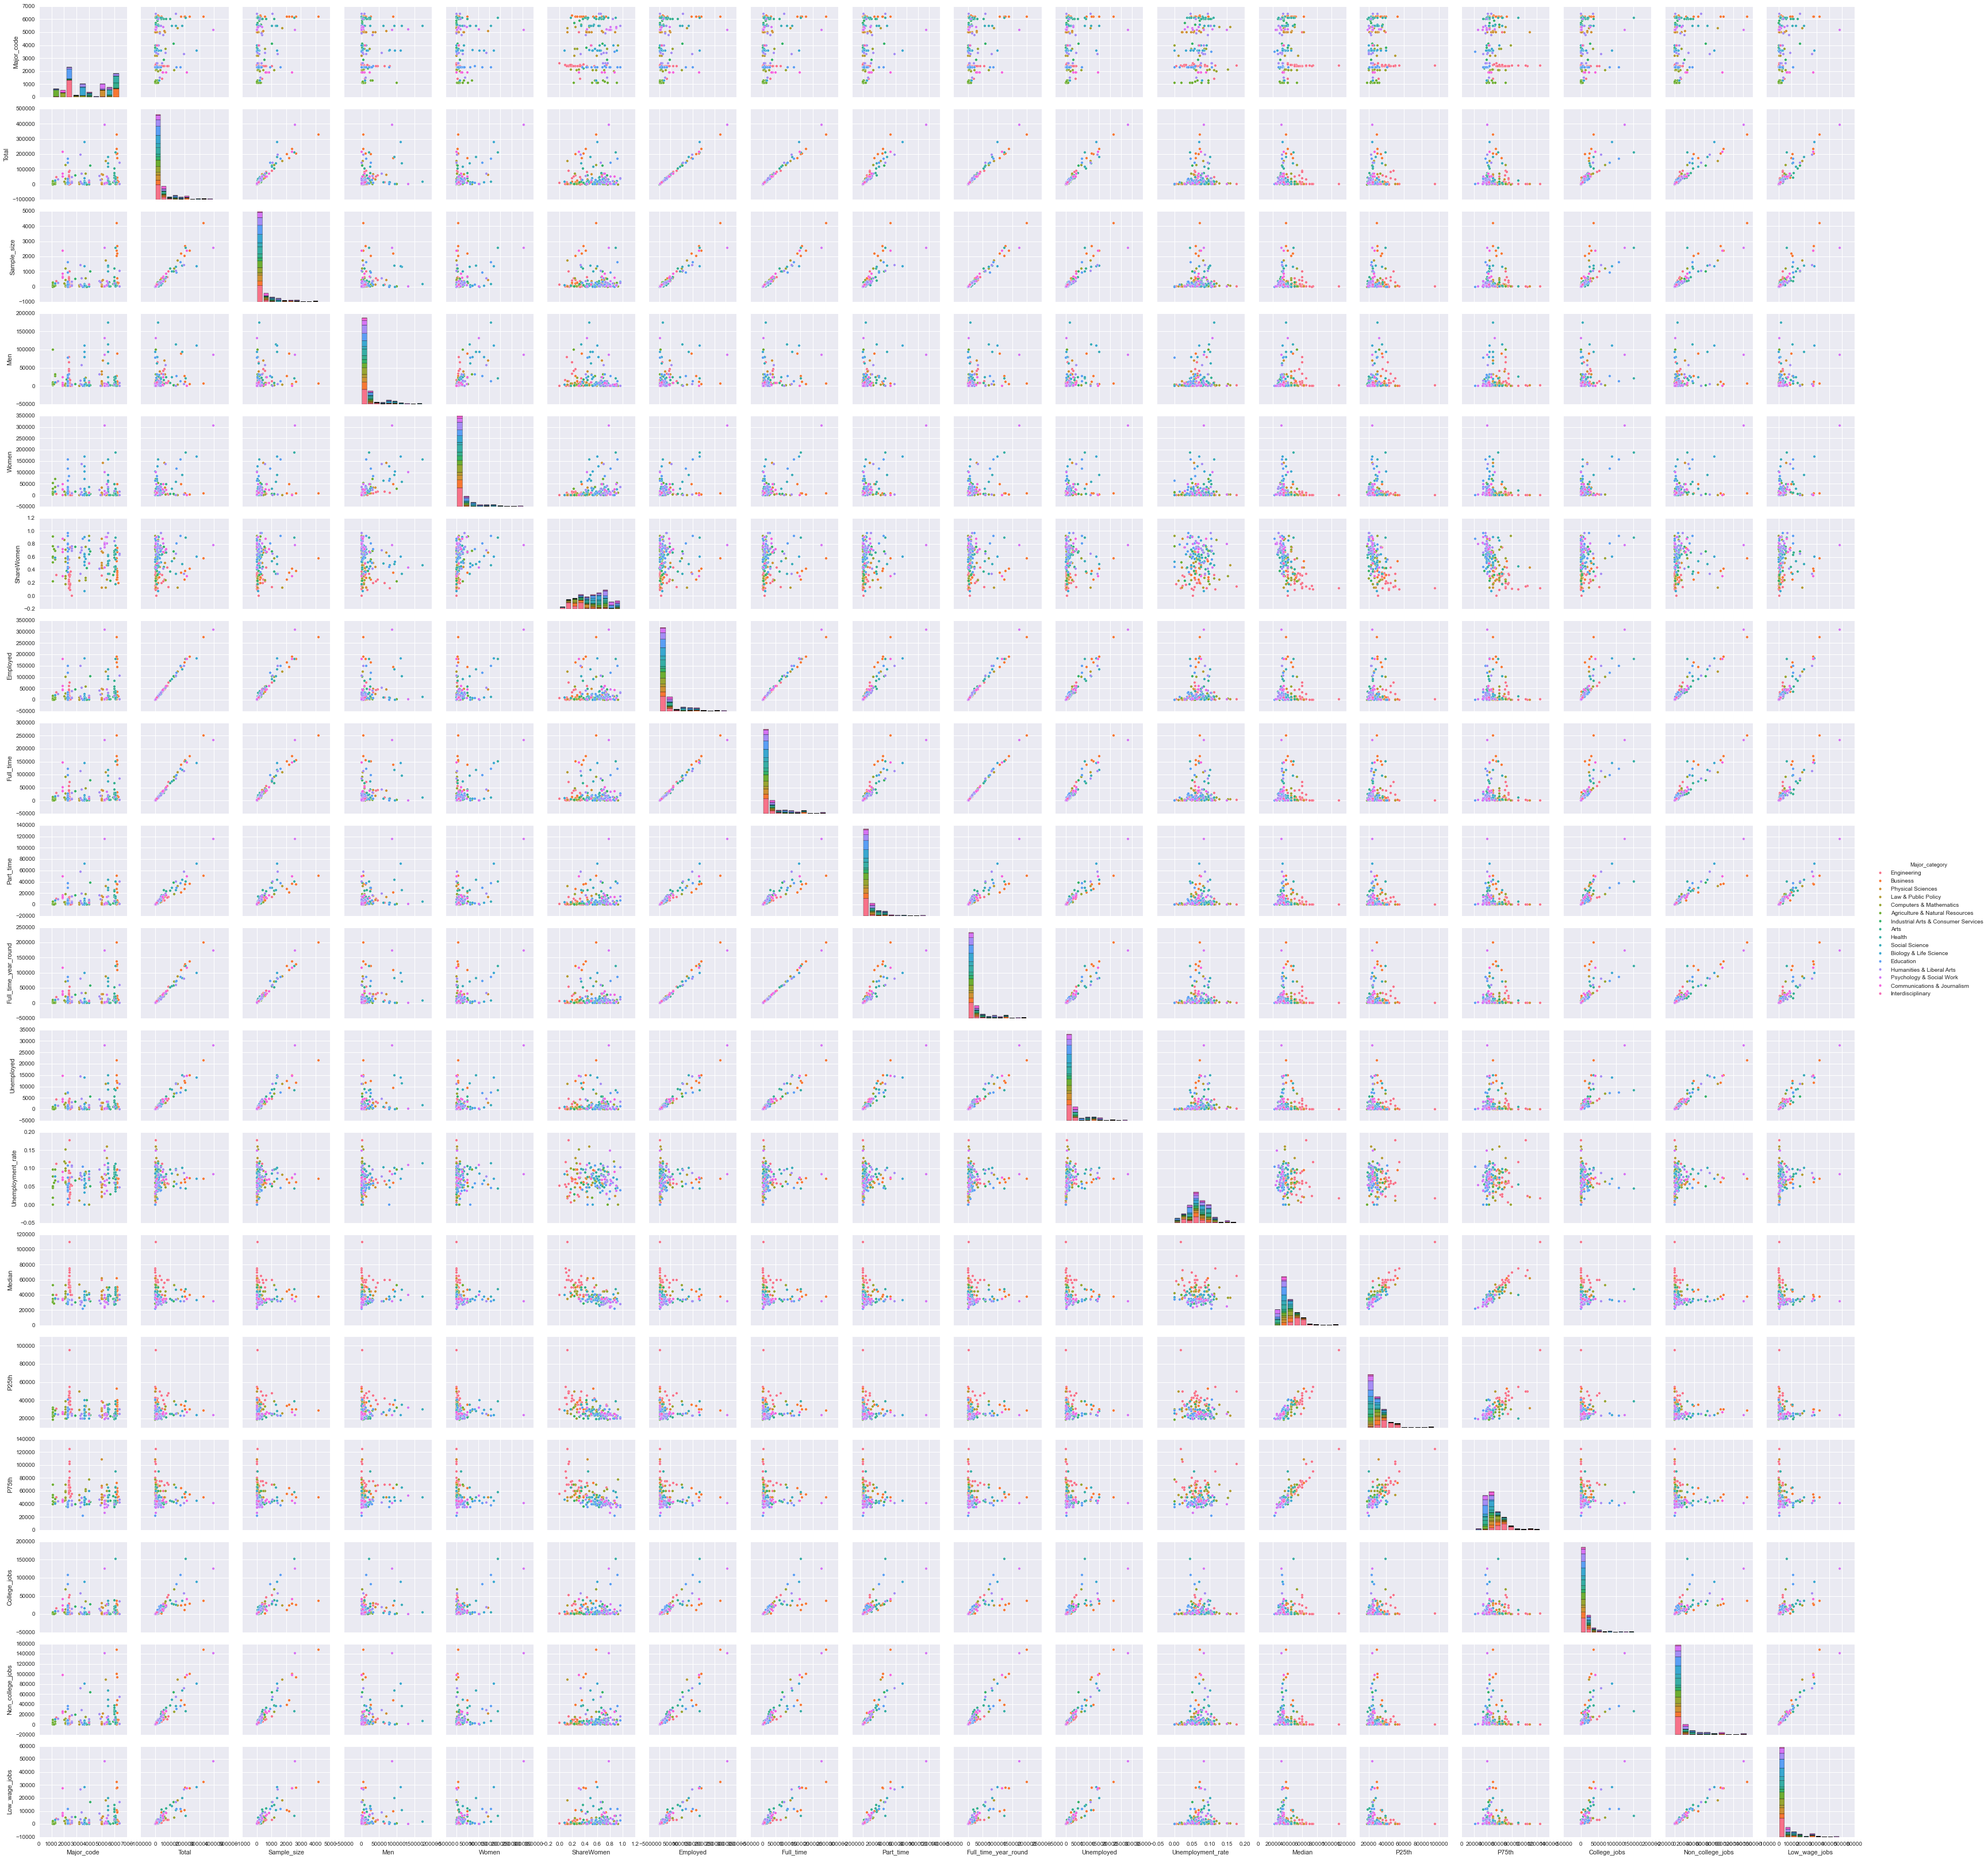

In [36]:
sns.pairplot(data, hue="Major_category")

In [37]:
# compute correlation matrix
data.corr()

Major_code     Total  Sample_size       Men     Women  \
Major_code              1.000000  0.200333     0.206580  0.036930  0.048456   
Total                   0.200333  1.000000     0.945662  0.262871  0.481571   
Sample_size             0.206580  0.945662     1.000000  0.174730  0.342827   
Men                     0.036930  0.262871     0.174730  1.000000  0.673249   
Women                   0.048456  0.481571     0.342827  0.673249  1.000000   
ShareWomen              0.073490  0.053814     0.013510 -0.112655  0.296876   
Employed                0.200925  0.996221     0.964462  0.234249  0.463872   
Full_time               0.199397  0.989358     0.978396  0.232432  0.428955   
Part_time               0.195184  0.950351     0.824824  0.269294  0.554862   
Full_time_year_round    0.205634  0.981145     0.985235  0.218846  0.409465   
Unemployed              0.223418  0.974804     0.918059  0.266298  0.439950   
Unemployment_rate       0.127894  0.072919     0.053229  0.138844  0.042954   
Median                 -0.176072 -0.109850    -0.067578  0.022419 -0.185242   
P25th                  -0.166864 -0.072723    -0.025229  0.045062 -0.118780   
P75th                  -0.094556 -0.086737    -0.055737  0.032647 -0.168943   
College_jobs            0.041198  0.800798     0.701704  0.215923  0.611389   
Non_college_jobs        0.232425  0.941337     0.915464  0.187386  0.359267   
Low_wage_jobs           0.225294  0.935599     0.860319  0.214532  0.423866   

                      ShareWomen  Employed  Full_time  Part_time  \
Major_code              0.073490  0.200925   0.199397   0.195184   
Total                   0.053814  0.996221   0.989358   0.950351   
Sample_size             0.013510  0.964462   0.978396   0.824824   
Men                    -0.112655  0.234249   0.232432   0.269294   
Women                   0.296876  0.463872   0.428955   0.554862   
ShareWomen              1.000000  0.056304   0.033038   0.114114   
Employed                0.056304  1.000000   0.995838   0.934528   
Full_time               0.033038  0.995838   1.000000   0.900877   
Part_time               0.114114  0.934528   0.900877   1.000000   
Full_time_year_round    0.024042  0.991047   0.998203   0.880855   
Unemployed              0.028328  0.968900   0.960102   0.945094   
Unemployment_rate      -0.034517  0.060937   0.056298   0.102653   
Median                 -0.614711 -0.107547  -0.082258  -0.190124   
P25th                  -0.527633 -0.067514  -0.042957  -0.153509   
P75th                  -0.553608 -0.087560  -0.065073  -0.158220   
College_jobs            0.151148  0.797534   0.772515   0.804987   
Non_college_jobs        0.041714  0.941326   0.933124   0.909634   
Low_wage_jobs           0.076406  0.927224   0.904852   0.951593   

                      Full_time_year_round  Unemployed  Unemployment_rate  \
Major_code                        0.205634    0.223418           0.127894   
Total                             0.981145    0.974804           0.072919   
Sample_size                       0.985235    0.918059           0.053229   
Men                               0.218846    0.266298           0.138844   
Women                             0.409465    0.439950           0.042954   
ShareWomen                        0.024042    0.028328          -0.034517   
Employed                          0.991047    0.968900           0.060937   
Full_time                         0.998203    0.960102           0.056298   
Part_time                         0.880855    0.945094           0.102653   
Full_time_year_round              1.000000    0.950711           0.050205   
Unemployed                        0.950711    1.000000           0.160101   
Unemployment_rate                 0.050205    0.160101           1.000000   
Median                           -0.072982   -0.126386          -0.110655   
P25th                            -0.033034   -0.092185          -0.082641   
P75th                            -0.056932   -0.097128          -0.04363